In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics

Acerca del conjunto de datos
Imagina que eres un investigador médico que recopila datos para un estudio. Has recopilado datos sobre un grupo de pacientes que padecían la misma enfermedad. Durante el tratamiento, cada paciente respondió a uno de cinco medicamentos: fármaco A, fármaco B, fármaco C, fármaco X y fármaco Y.

Parte de tu trabajo consiste en construir un modelo para determinar qué fármaco podría ser adecuado para un futuro paciente con la misma enfermedad. Las características de este conjunto de datos son la edad, el sexo, la presión arterial y el colesterol de los pacientes, y el objetivo es el fármaco al que respondió cada paciente.

Se trata de un ejemplo de un clasificador multiclase, y a continuación, usarlo para predecir la clase de un paciente desconocido o para recetar un fármaco a un nuevo paciente.

In [ ]:
my_data = pd.read_csv('/content/drug200.csv')
my_data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [ ]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


Esto nos indica que 4 de las 6 características de este dataset son categóricas (object), por lo que deberán convertirse en numéricas para su uso en el modelado.

In [ ]:
label_encoder = LabelEncoder()
my_data['Sex'] = label_encoder.fit_transform(my_data['Sex'])
my_data['BP'] = label_encoder.fit_transform(my_data['BP'])
my_data['Cholesterol'] = label_encoder.fit_transform(my_data['Cholesterol'])
my_data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY
...,...,...,...,...,...,...
195,56,0,1,0,11.567,drugC
196,16,1,1,0,12.006,drugC
197,52,1,2,0,9.894,drugX
198,23,1,2,1,14.020,drugX


Con esto, ahora disponemos de 5 parámetros que pueden utilizarse para el modelado y una característica como variable objetivo. Al comparar los datos antes y después de la codificación de etiquetas, podemos observar la siguiente asignación.

Para el parámetro "Sexo":  $M \rightarrow 1, F \rightarrow 0$ <br>

Para el parámetro "PA" (presión arterial): $High \rightarrow 0, Low \rightarrow 1, Normal \rightarrow 2$<br>

Para el parámetro "Colesterol": $High \rightarrow 0, Normal \rightarrow 1$

In [ ]:
my_data.isnull().sum()

,0
Age,0
Sex,0
BP,0
Cholesterol,0
Na_to_K,0
Drug,0


Esto nos indica que no hay valores faltantes en ninguno de los campos.

Para evaluar la correlación de la variable objetivo con las características de entrada, será conveniente asignar los diferentes fármacos a un valor numérico.


---


Los algoritmos de **ML** no entienden texto, necesitan números.

Entonces creamos un diccionario `custom_map` que asigna manualmente cada fármaco a un número:

drugA → 0

drugB → 1

drugC → 2

drugX → 3

drugY → 4

In [ ]:
custom_map = {'drugA':0,'drugB':1,'drugC':2,'drugX':3,'drugY':4}
my_data['Drug_num'] = my_data['Drug'].map(custom_map)
my_data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Drug_num
0,23,0,0,0,25.355,drugY,4
1,47,1,1,0,13.093,drugC,2
2,47,1,1,0,10.114,drugC,2
3,28,0,2,0,7.798,drugX,3
4,61,0,1,0,18.043,drugY,4
...,...,...,...,...,...,...,...
195,56,0,1,0,11.567,drugC,2
196,16,1,1,0,12.006,drugC,2
197,52,1,2,0,9.894,drugX,3
198,23,1,2,1,14.020,drugX,3


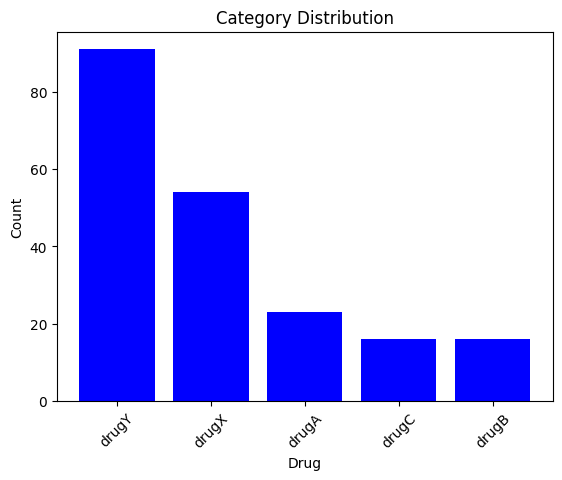

In [ ]:
category_counts = my_data['Drug'].value_counts()

# Gráfico de conteo
plt.bar(category_counts.index, category_counts.values, color='blue')
plt.xlabel('Drug')
plt.ylabel('Count')
plt.title('Category Distribution')
plt.xticks(rotation=45)
plt.show()

### Observaciones del gráfico

- La mayoría de los pacientes respondieron al **DrugY**, seguido de **DrugX**.  
- Los fármacos **DrugA, DrugB y DrugC** tienen una representación mucho menor en comparación.  
- Esto indica un **desbalance de clases**, lo cual puede influir en el modelo al favorecer las clases mayoritarias.  


### **MODELADO**

Para modelar este dataset con un clasificador de árbol de decisión, primero lo dividimos en subconjuntos de entrenamiento y de prueba. Para ello, separamos la variable objetivo de las variables de entrada.

In [ ]:
y = my_data['Drug']
X = my_data.drop(['Drug','Drug_num'], axis=1)

Utilice la función `train_test_split()` para separar los datos de entrenamiento de los de prueba.

In [ ]:
# Podemos usar el 30 % de los datos para las pruebas y el resto para entrenar el árbol de decisión.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32)
print(X_train.shape, X_test.shape)

(140, 5) (60, 5)


Podemos definir ahora al árbol de Decisión como **drugTree** y entrenarlo con los datos de ***entrenamiento***

In [ ]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

### **EVALUACIÓN**

Una vez entrenado, podemos hacer pequeñas predicciones con el set de pruebas

In [ ]:
tree_pred = drugTree.predict(X_test)

Ahora podemos checar la exactitud de nuestro modelo usando la metrica de `accuracy`




In [ ]:
print('Precisión del Arbol de Decisión: ', metrics.accuracy_score(y_test, tree_pred))

Precisión del Arbol de Decisión:  0.9833333333333333


Cómo nuestro dataset esta desbalanceado, tenemos que ver cómo se comporta el modelo (lo haremos con un `Classification report`) y con una **matriz de confusión** (`confusion_matrix`) para verificar en que clase el modelo se equivoca

In [ ]:
# Classification report
from sklearn.metrics import classification_report
print("\nClassification Report:\n", classification_report(y_test, tree_pred))



Classification Report:
               precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         8
       drugB       1.00      1.00      1.00         5
       drugC       1.00      1.00      1.00         3
       drugX       1.00      0.94      0.97        16
       drugY       0.97      1.00      0.98        28

    accuracy                           0.98        60
   macro avg       0.99      0.99      0.99        60
weighted avg       0.98      0.98      0.98        60



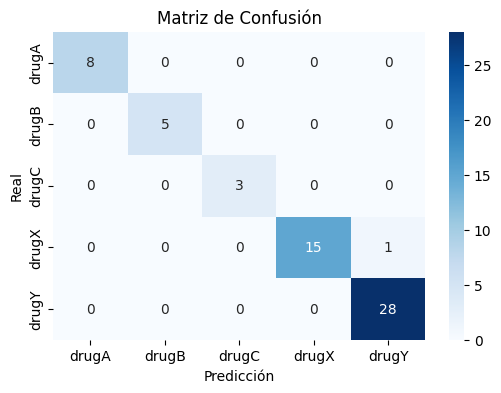

In [ ]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, tree_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['drugA','drugB','drugC','drugX','drugY'],
            yticklabels=['drugA','drugB','drugC','drugX','drugY'])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

## Observaciones:

*   El modelo de árbol de decisión alcanzó un 98% de accuracy en el conjunto de prueba.
*   Las clases con menor representación (drugA, drugB, drugC) fueron clasificadas correctamente al 100%.
*   El desempeño más bajo fue en drugX, con un recall de 94%, donde un registro fue clasificado erróneamente como drugY.
* En general, el modelo muestra un excelente rendimiento, validando su capacidad para recomendar el fármaco correcto a nuevos pacientes.



### **Visualización del Árbol**

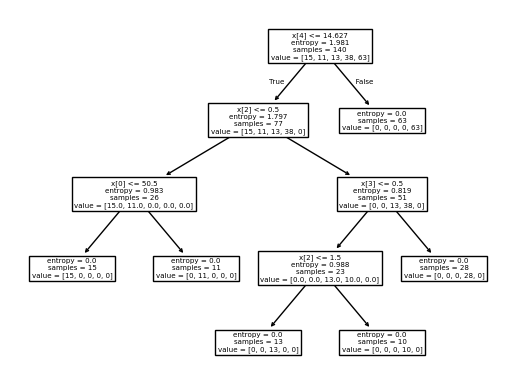

In [ ]:
plot_tree(drugTree)
plt.show()

### Interpretación del Árbol de Decisión 🌳

- El árbol seleccionó la relación Na_to_K como la primera variable de decisión (raíz), lo que indica que es la característica más influyente en la prescripción del fármaco.  ${Na\_to\_K} \gt 14.027$.
- Posteriormente, variables como Edad, Presión Arterial y Colesterol refinan la clasificación en ramas más específicas.  
- La mayoría de las hojas tienen entropía = 0, lo que muestra una separación muy clara entre clases.  
- Este comportamiento está alineado con la alta precisión (98%) observada en las métricas.
